In [104]:
import pandas as pd
import matplotlib.pyplot  as plt
import os
import gluonts.torch
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

In [105]:
data = pd.read_csv('data/calm_p.csv')

In [106]:
data.head()

,Time,1,2,3,4,5,6
0,10.000,1.442542,-0.343208,-0.528292,1.852549,2.037647,-0.435750
1,10.001,1.442150,-0.343208,-0.527508,1.852549,2.037255,-0.435358
2,10.002,1.441366,-0.343600,-0.526724,1.853333,2.036471,-0.434966
3,10.003,1.440582,-0.344384,-0.525940,1.854118,2.035686,-0.434966
4,10.004,1.440189,-0.345169,-0.525547,1.854902,2.035294,-0.435358


In [107]:
data = data.set_index(pd.to_datetime(data.index, unit = 's'))

In [108]:
data.columns

Index(['Time', '1', '2', '3', '4', '5', '6'], dtype='object')

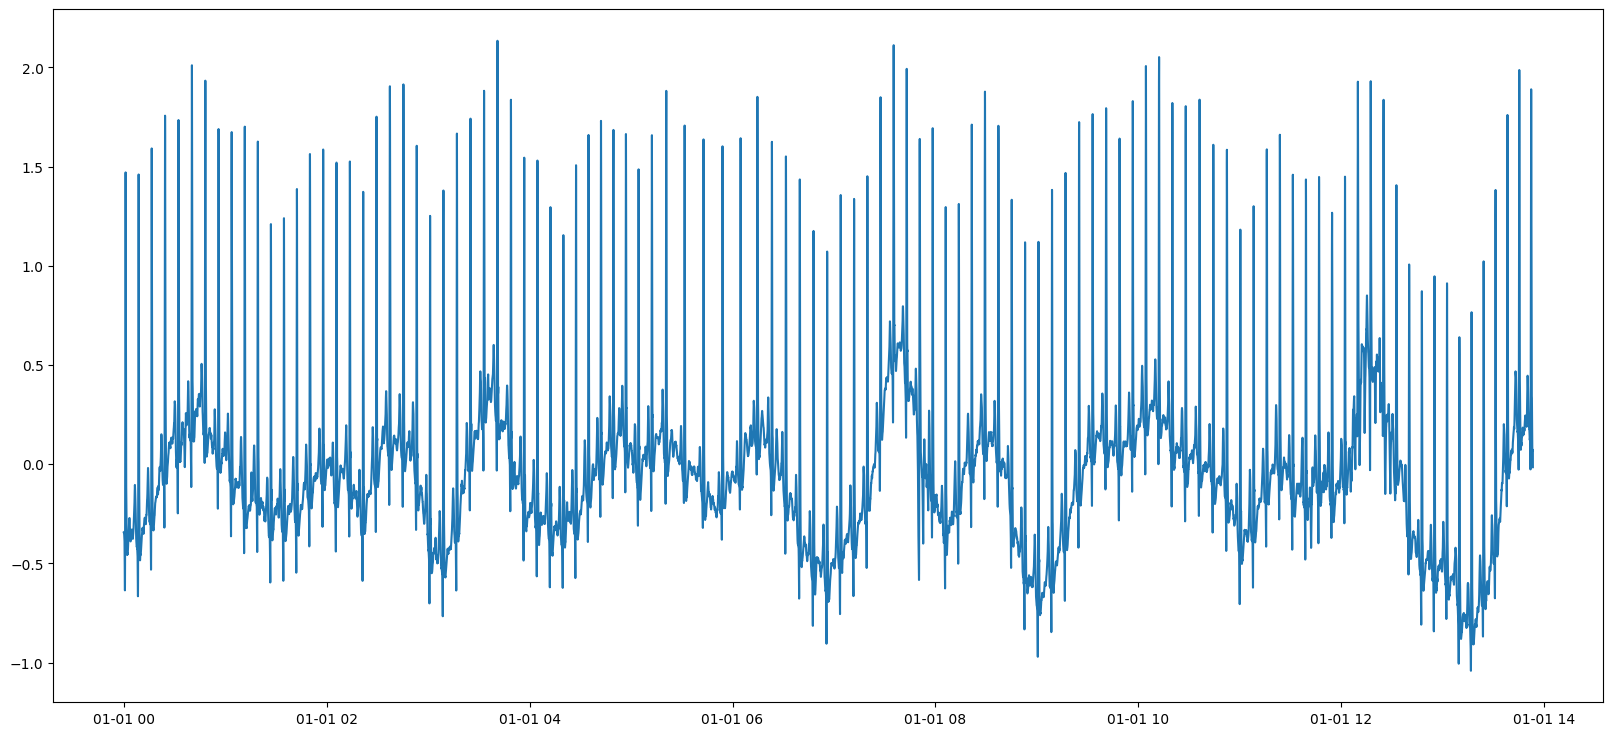

In [109]:
plt.figure(figsize=(20,9))
plt.plot(data['2'])

In [110]:
pdts_data = PandasDataset(data, target = '2')
train,test = split(pdts_data, offset=-2500)

In [111]:
import numpy as np
import torch.optim as optim
import torch.utils.data as torch_data
 
model = DeepAREstimator(freq = '10min', prediction_length=2500, trainer_kwargs={'max_epochs':5})

EPOCHS = 1

In [112]:
predictor = model.train(train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                           | Out sizes     
----------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 27.6 K | [[1, 1], [1, 1], [1, 3508, 6], [1, 3508], [1, 3508], [1, 2500, 6]] | [1, 100, 2500]
----------------------------------------------------------------------------------------------------------------------------
27.6 K    Trainable params
0         Non-trainable params
27.6 K    Total params
0.111     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached -0.43274 (best -0.43274), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_1\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached -1.72199 (best -1.72199), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_1\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached -2.07065 (best -2.07065), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_1\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached -2.25902 (best -2.25902), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_1\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached -2.35211 (best -2.35211), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_1\\checkpoints\\epoch=4-step=250.ckpt' as top

In [127]:
forecast = list(predictor.predict(train))

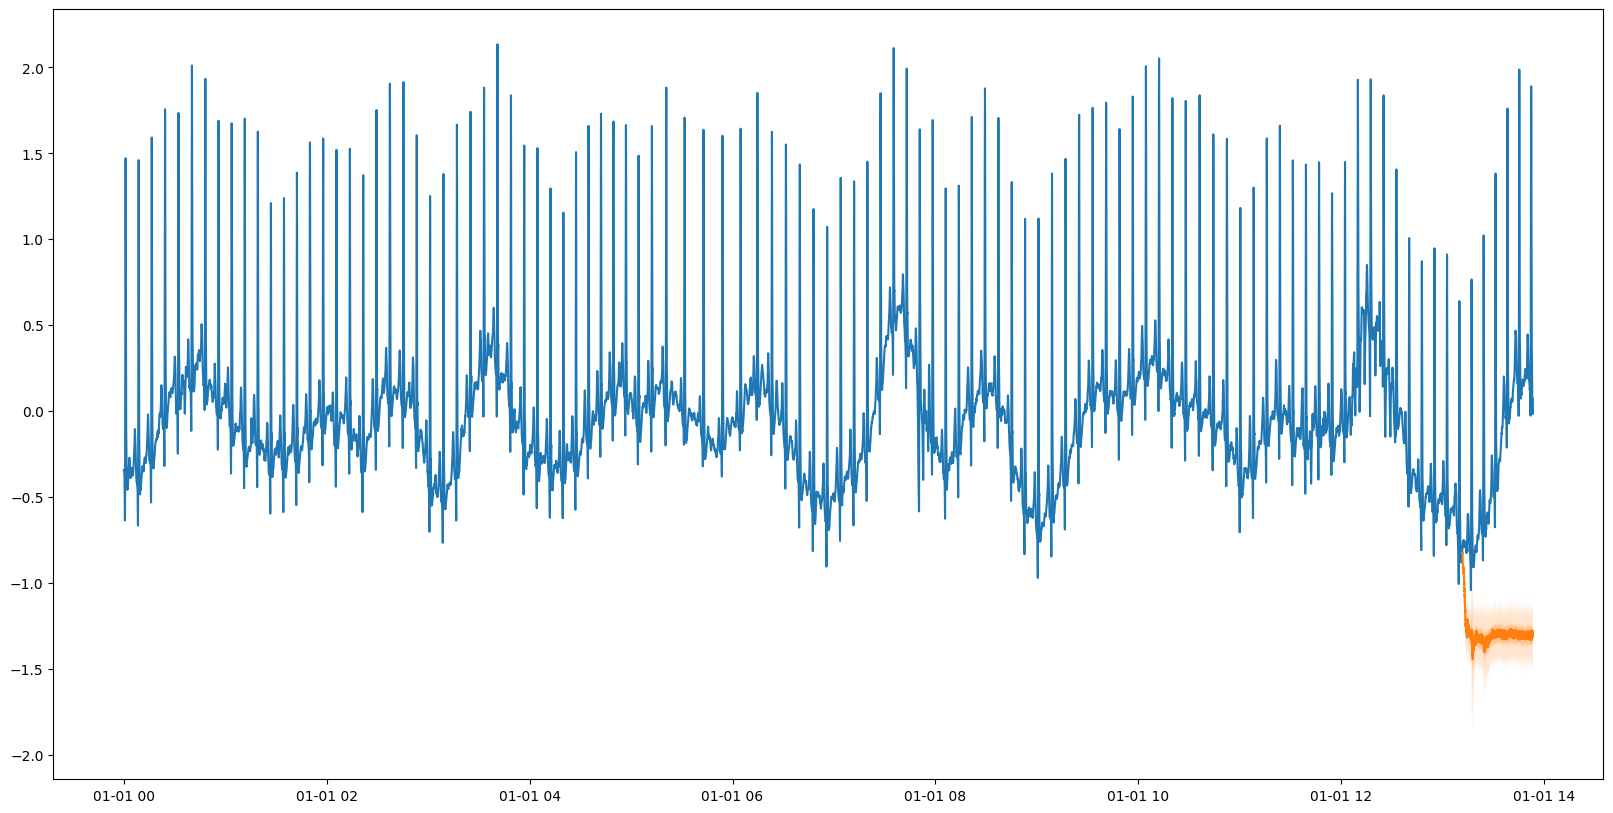

In [125]:
plt.figure(figsize=(20,10))
plt.plot(data['2'])
for fore in forecast:
    fore.plot()